In [ ]:
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import datasets, layers, losses
from keras.utils.generic_utils import get_custom_objects
from tensorflow import keras
from keras.layers import Activation
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

Cloning into 'ssp19ai_utils'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.
Already up to date.


<module 'ssp19ai_utils.utils' from '/content/ssp19ai_utils/utils.py'>

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# بخش اول

In [ ]:
N = 2000
X, y = make_circles(N, noise=0.04, random_state=17)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

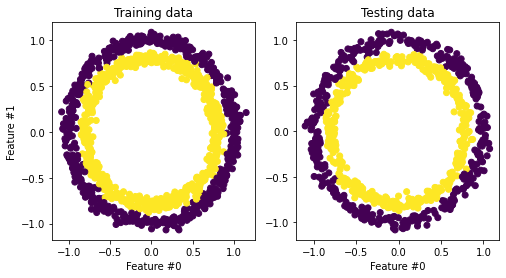

In [ ]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

## طراحی شبکه بدون تابع فعالسازی در لایه‌های آن

In [ ]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, kernel_initializer='he_uniform'),
      layers.Dense(8, kernel_initializer='he_uniform'),
      layers.Dense(2, kernel_initializer='he_uniform'),
      layers.Dense(1, kernel_initializer='he_uniform')              
])

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 16)                48        
                                                                 
 dense_65 (Dense)            (None, 8)                 136       
                                                                 
 dense_66 (Dense)            (None, 2)                 18        
                                                                 
 dense_67 (Dense)            (None, 1)                 3         
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 9ms/step - loss: 6.0697e-08 - accuracy: 0.5000 - val_loss: 5.7966e-08 - val_accuracy: 0.4963
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.5000 - val_loss: 5.7966e-08 - val_accuracy: 0.4963
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5000 - val_loss: 5.7966e-08 - val_accuracy: 0.4963
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5000 - val_loss: 5.7966e-08 - val_accuracy: 0.4963
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5000 - val_loss: 5.7966e-08 - val_accuracy: 0.4963
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5000 - val_loss: 5.7966e-08 - val_accuracy: 0.4963
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5000 - val_loss

### همانطور که می بینیم، به دلیل نبود تابع فعالسازی، دقت با هر ایپاک بهبود پیدا نمی کند.
### دقتی که به دست آمده است نیز حدودا ۵۰ درصد است که به این معنی است که الگوریتم کاملا به صورت رندوم عمل کرده و نمی تواند داده ها را به صورت مناسب دسته بندی کند.

### در این مرحله تابع فعالسازی خطی را به شبکه وارد می کنیم:

In [ ]:
def linear_activation(x):
    return 4*x + 6 

In [ ]:
get_custom_objects().update({'linear_activation': Activation(linear_activation)})

In [ ]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "linear_activation", kernel_initializer='he_uniform')              
])

In [ ]:
model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 6.0697e-08 - accuracy: 0.5575 - val_loss: 5.7966e-08 - val_accuracy: 0.5375
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5575 - val_loss: 5.7966e-08 - val_accuracy: 0.5375
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5575 - val_loss: 5.7966e-08 - val_accuracy: 0.5375
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5575 - val_loss: 5.7966e-08 - val_accuracy: 0.5375
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5575 - val_loss: 5.7966e-08 - val_accuracy: 0.5375
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.5575 - val_loss: 5.7966e-08 - val_accuracy: 0.5375
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5575 - val_loss

### همانطور که مشاهده می کنیم، تابع فعالسازی خطی نیز باعث بهبود و پیشرفت نمی شود زیرا تنها مقادیر را در عددی ضرب کرده و با عددی ثابت جمع می کند.

### خطای مناسب برای مسئله رگرسیون:

In [ ]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "linear_activation", kernel_initializer='he_uniform')              
])

In [ ]:
model.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 1419846.5000 - accuracy: 0.5325 - val_loss: 438448.5312 - val_accuracy: 0.4988
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 229245.2344 - accuracy: 0.5000 - val_loss: 77639.5625 - val_accuracy: 0.4913
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 32640.8828 - accuracy: 0.4958 - val_loss: 7116.0913 - val_accuracy: 0.5013
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 2420.5293 - accuracy: 0.5050 - val_loss: 335.7346 - val_accuracy: 0.4963
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 106.9357 - accuracy: 0.4942 - val_loss: 14.9599 - val_accuracy: 0.4938
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 4.5976 - accuracy: 0.5117 - val_loss: 0.6211 - val_accuracy: 0.4963
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.5025 - val_loss: 0.2554 - val_ac

### همچنان بهبودی حاصل نشده است.

### شبکه عصبی با فقط یک لایه با تعداد نورون دلخواه:

In [ ]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "linear_activation", kernel_initializer='he_uniform')              
])

In [ ]:
model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 6.0697e-08 - accuracy: 0.5092 - val_loss: 5.7966e-08 - val_accuracy: 0.4863
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5092 - val_loss: 5.7966e-08 - val_accuracy: 0.4863
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5092 - val_loss: 5.7966e-08 - val_accuracy: 0.4863
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.5092 - val_loss: 5.7966e-08 - val_accuracy: 0.4863
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5092 - val_loss: 5.7966e-08 - val_accuracy: 0.4863
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.5092 - val_loss: 5.7966e-08 - val_accuracy: 0.4863
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.5092 - val_loss

### خیر، باز هم نمی توان داده ها را دسته بندی کرد.

### تنظیم مقادیر مختلف برای نرخ یادگیری:

#### learning rate: 0.0001

In [ ]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "sigmoid", kernel_initializer='he_uniform')              
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 0.9495 - accuracy: 0.5092 - val_loss: 0.9641 - val_accuracy: 0.4863
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9240 - accuracy: 0.5092 - val_loss: 0.9379 - val_accuracy: 0.4863
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9017 - accuracy: 0.5092 - val_loss: 0.9165 - val_accuracy: 0.4863
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8827 - accuracy: 0.5092 - val_loss: 0.8965 - val_accuracy: 0.4863
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.8659 - accuracy: 0.5092 - val_loss: 0.8796 - val_accuracy: 0.4863
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8515 - accuracy: 0.5083 - val_loss: 0.8641 - val_accuracy: 0.4850
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8385 - accuracy: 0.4958 - val_loss: 0.8508 - val_accuracy: 0.4725
Epoch 8/10
38/38 [==

#### learning rate: 10

In [ ]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "sigmoid", kernel_initializer='he_uniform')              
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 10), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 45.2453 - accuracy: 0.4758 - val_loss: 0.6951 - val_accuracy: 0.4863
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7393 - accuracy: 0.4975 - val_loss: 1.1233 - val_accuracy: 0.4863
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9511 - accuracy: 0.4825 - val_loss: 0.8315 - val_accuracy: 0.4863
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7727 - accuracy: 0.5092 - val_loss: 0.8603 - val_accuracy: 0.4863
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7519 - accuracy: 0.5025 - val_loss: 0.8209 - val_accuracy: 0.4863
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9810 - accuracy: 0.4658 - val_loss: 0.8532 - val_accuracy: 0.5138
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7341 - accuracy: 0.5058 - val_loss: 0.7525 - val_accuracy: 0.4863
Epoch 8/10
38/38 [=

### شبکه عصبی به دلخواه برای بهترین نتیجه (با نرخ یادگیری 0.01):

In [ ]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "sigmoid", kernel_initializer='he_uniform')              
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 0.6829 - accuracy: 0.5625 - val_loss: 0.6459 - val_accuracy: 0.6950
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6014 - accuracy: 0.7467 - val_loss: 0.5600 - val_accuracy: 0.7038
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8892 - val_loss: 0.3722 - val_accuracy: 0.8763
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.9325 - val_loss: 0.1816 - val_accuracy: 0.9875
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9808 - val_loss: 0.1180 - val_accuracy: 0.9775
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9862
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0626 - accuracy: 0.9883 - val_loss: 0.0669 - val_accuracy: 0.9825
Epoch 8/10
38/38 [==

#### دلیل اینکه بقیه مقادیر نرخ یادگیری به خوبی این مقدار عمل نمی کنند این است که مقدار آنها بسیار زیاد یا بسیار کم است. به طور کلی نرخ های یادگیری به طور تصادفی و با آزمون و خطا توسط برنامه نویس (مانند همین حالا که با امتحان کردن چند مقدار نتیجه گرفتیم که 0.01 بهترین نتیجه را می دهد) تعیین می شوند. البته یکی از راه های محاسباتی برای رسیدن به بهترین مقدار نرخ یادگیری، این است که ابتدا به آموزش مدل با نرخ یادگیری بسیار پایین و افزایش آن (به صورت خطی یا نمایی) در هر ایپاک می پردازیم تا آنکه به مناسب ترین نتیجه برسیم. این مقدار به طور تقریبی، اکثرا بین 0.001 تا 0.01 قرار دارد.


### دلیل عملکرد نسبتا مناسب این شبکه این است که اولا نرخ یادگیری آن به خوبی تنظیم شده است و همچنین تابع های فعالسازی ای که در لایه های میانی قرار دارند رلو هستند که بهترین انتخاب هستند.  همچنین برای اندازه بچ نیز مقدار ۳۲ را قرار دادیم که طبق تجربه از بهترین مقادیر برای این متغیر است.

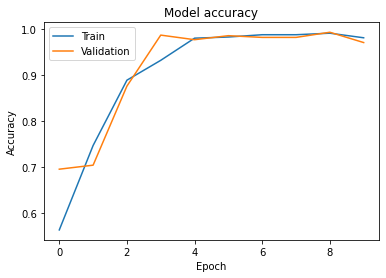

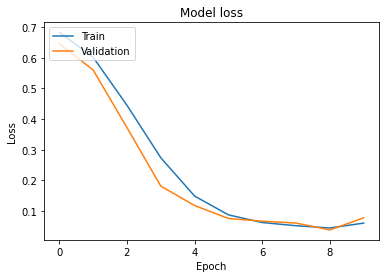

In [ ]:
utils.plot_accuracy_and_loss(history)

# بخش دوم

In [ ]:
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

#### Normalization

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

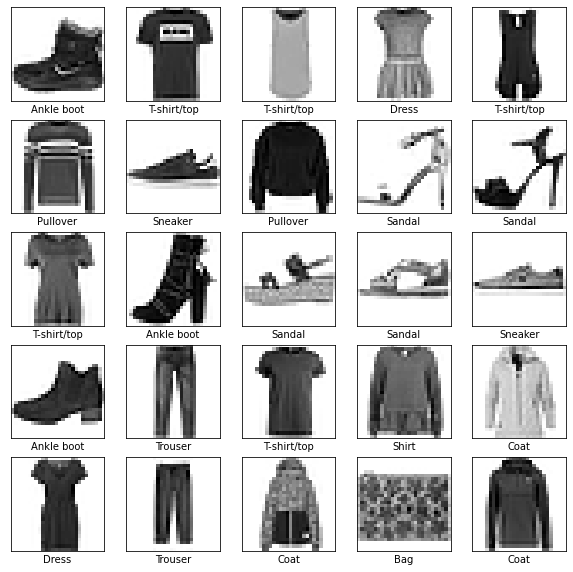

In [ ]:
utils.plot_multi_images(X_train, y_train, class_names)

In [ ]:
y_test.shape

(10000,)

In [ ]:
model = keras.Sequential ([
      layers.Flatten(input_shape=(28, 28)),
      layers.Dense(256, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(128, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(64, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(10, activation = "softmax", kernel_initializer='he_uniform')              
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 12, verbose = 0)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3924 - accuracy: 0.8642 - val_loss: 0.3772 - val_accuracy: 0.8683
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3872 - accuracy: 0.8639 - val_loss: 0.3859 - val_accuracy: 0.8610
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3883 - accuracy: 0.8671 - val_loss: 0.3779 - val_accuracy: 0.8701
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3663 - accuracy: 0.8708 - val_loss: 0.3873 - val_accuracy: 0.8675
Epoch 5/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3721 - accuracy: 0.8686 - val_loss: 0.4177 - val_accuracy: 0.8545
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4604 - accuracy: 0.8504 - val_loss: 0.4347 - val_accuracy: 0.8557
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3647 - accuracy: 0.8717 - val_loss: 0.4234 - val_accuracy:

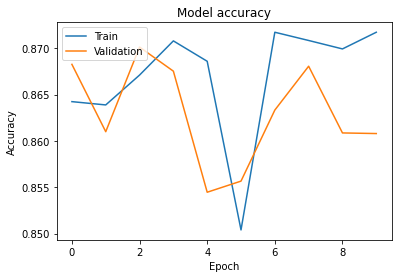

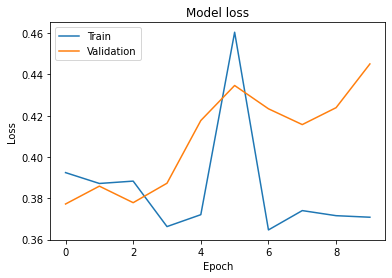

In [ ]:
utils.plot_accuracy_and_loss(history)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.8453
Test accuracy: 0.845300018787384


In [ ]:
predictions = model.predict(X_test)

Confusion matrix


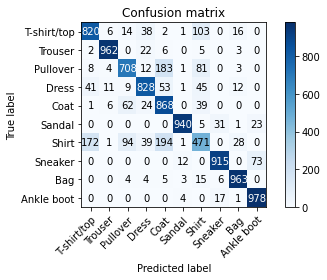

In [ ]:
predicted_classes = utils.label_with_highest_prob(predictions)
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=y_test, classes=np.array(class_names))

### دلیل عملکرد نسبتا مناسب این شبکه این است که اولا نرخ یادگیری آن به خوبی تنظیم شده است و همچنین تابع های فعالسازی ای که در لایه های میانی قرار دارند رلو هستند که بهترین انتخاب هستند و برای لایه آخر نیز از سافتمکس استفاده شده است که برای زمانی که چندین کلاس داریم انتخاب مناسبی است. همچنین از همان ابتدا، اندازه پیکسل های عکس نرمالایز شده است که در صورت انجام ندادن این کار نمی توانستیم نتیجه مطلوب بگیریم. همچنین برای اندازه بچ نیز مقدار ۳۲ را قرار دادیم که طبق تجربه از بهترین مقادیر برای این متغیر است.